<a href="https://colab.research.google.com/github/jnsbrdbr/new_thesiis/blob/main/9.7_TUlogesticregression1320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 7.7 MB/s 


In [4]:
with open('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [5]:
#final data
print(result)

             0         1         2         3         4          5         6  \
0    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
1    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
2    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
3    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
4    -0.018444 -4.221080 -0.916678 -0.715889 -0.869072  -1.349276 -0.475212   
...        ...       ...       ...       ...       ...        ...       ...   
9995 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9996 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9997 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9998 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9999 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   

             7         8         9  ...          1 

# **logestic** **regression**

In [6]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [7]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                   shuffle=True)

In [8]:
#train the data

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=100000,penalty='l2', C=0.1,solver='lbfgs')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=100000)

In [9]:
#score of data by prediction at once

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9895


In [10]:
count=0
for i in range (0,len(predictions)):
  if predictions[i]==1:
    count+=1
print(count)

3997


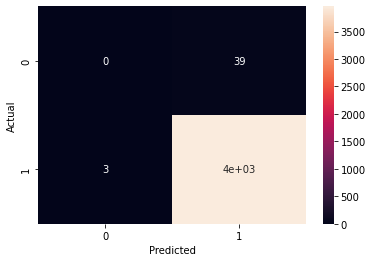

In [11]:
#plotting confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [12]:
#Accuracy by prediction in once

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.9895


In [13]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 3958
False Positives: 39
True Negatives: 0
False Negatives: 3


In [14]:
#cross_validation and accracy

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)#, random_state=42
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.003)


In [15]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict


cv = KFold(n_splits=10, shuffle=True)#, shuffle=True, random_state=42
scores_recall = cross_val_score(logisticRegr,X, y, scoring='recall', cv=cv)

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.999 (0.000)


In [16]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, shuffle=True)#, shuffle=True, random_state=42
scores_precision = cross_val_score(logisticRegr, X, y, scoring='precision', cv=cv)

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.991 (0.002)


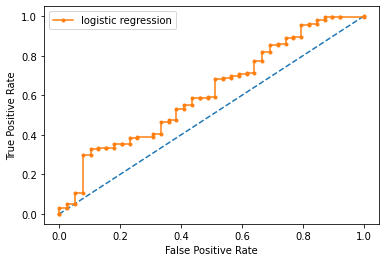


 Logistic ROC AUC 0.616


In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logisticRegr = LogisticRegression(max_iter=100000,penalty='l2', C=0.1,solver='lbfgs')
logisticRegr.fit(x_train, y_train)
yhat = logisticRegr.predict_proba(x_test)
pos_probs = yhat[:,1]
pyplot.plot([1, 0], [1, 0], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='logistic regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
roc_auc = roc_auc_score(y_test, pos_probs)
print('\n','Logistic ROC AUC %.3f' % roc_auc)

In [18]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 

 
#Implementing cross validation
 
#X = X.sample(frac = 1)
#y= y.sample(frac = 1)
kf = KFold(n_splits=10)#, random_state=None
model = LogisticRegression(max_iter=100000,penalty='l2', C=0.1,solver='lbfgs')#(solver= 'liblinear')
 
acc_score = list()
res_tpr = list()
res_fpr = list()
for train_index , test_index in kf.split(X):
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_values, labels=[1, 0]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    tpr=(np.divide(tp,(tp+fn)))
    fpr=(np.divide(fp,(fp+tn)))
    if tp==0:
      tpr=0
    if fp==0:
      fpr=0

    print('tpr=%.4f fpr=%.3f' % ( mean(tpr), mean(fpr)))
    print('x')
    res_tpr.append(mean(tpr))
    res_fpr.append(mean(fpr))
    print('---------------------')

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = np.sum(acc_score)/10
total_tpr=np.sum(res_tpr)/10
total_fpr=np.sum(res_fpr)/10
print('\n\n',' total_tpr=%.4f total_fpr=%.3f' % (round(total_tpr,2),round(total_fpr,2)))
#print('\n\n','accuracy of each fold - {}'.format(acc_score))
print('\n\n','Avg accuracy : {}'.format(avg_acc_score))

True Positives: 0
False Positives: 0
True Negatives: 2973
False Negatives: 27
tpr=0.0000 fpr=0.000
x
---------------------
True Positives: 0
False Positives: 3
True Negatives: 2972
False Negatives: 25
tpr=0.0000 fpr=0.001
x
---------------------
True Positives: 0
False Positives: 2
True Negatives: 2967
False Negatives: 31
tpr=0.0000 fpr=0.001
x
---------------------
True Positives: 0
False Positives: 1
True Negatives: 2971
False Negatives: 28
tpr=0.0000 fpr=0.000
x
---------------------
True Positives: 0
False Positives: 2
True Negatives: 2971
False Negatives: 27
tpr=0.0000 fpr=0.001
x
---------------------
True Positives: 0
False Positives: 1
True Negatives: 2966
False Negatives: 33
tpr=0.0000 fpr=0.000
x
---------------------
True Positives: 0
False Positives: 2
True Negatives: 2975
False Negatives: 23
tpr=0.0000 fpr=0.001
x
---------------------
True Positives: 0
False Positives: 2
True Negatives: 2972
False Negatives: 26
tpr=0.0000 fpr=0.001
x
---------------------
True Positives: 